In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cifar-10/trainLabels.csv
/kaggle/input/cifar-10/sampleSubmission.csv
/kaggle/input/cifar-10/test.7z
/kaggle/input/cifar-10/train.7z


In [2]:
from fastai.vision.all import *

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
!pip install py7zr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.7/66.7 kB 4.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 58.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 412.3/412.3 kB 35.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.8/138.8 kB 12.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.8/49.8 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 10.9 MB/s eta 0:00:00


In [4]:
import py7zr

archive_path = '../input/cifar-10/train.7z'
extract_folder = '/kaggle/temp/'

with py7zr.SevenZipFile(archive_path, mode='r') as archive:
    archive.extractall(path=extract_folder)
# Loading your labels CSV
train_labels = pd.read_csv("../input/cifar-10/trainLabels.csv", header="infer")

In [5]:
import os

# List files in '../input/cifar-10/'
print(os.listdir('../input/cifar-10/'))


['trainLabels.csv', 'sampleSubmission.csv', 'test.7z', 'train.7z']


In [6]:
import os

# Parent paths for training and validation sets
parent_path_train = "/kaggle/temp/train"
parent_path_valid = "/kaggle/temp/valid"

# Assuming you have a list of classes like this
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Create subdirectories for each class under train and valid directories
for class1 in classes:
    # For the training directory
    path_train = os.path.join(parent_path_train, class1)
    os.makedirs(path_train, exist_ok=True)  # This will create directories if they don't exist
    
    # For the validation directory
    path_valid = os.path.join(parent_path_valid, class1)
    os.makedirs(path_valid, exist_ok=True)  # This will create directories if they don't exist

# Moving images to their respective directories based on labels
for (int_ind, row) in train_labels.iterrows():
    id = str(row["id"]) + ".png"
    source_path = os.path.join(parent_path_train, id)
    
    if not os.path.exists(source_path):
        print(f"Missing source file: {source_path}")
        continue
    
    p = np.random.random()
    if p <= 0.8:
        target_path = os.path.join(parent_path_train, row["label"], id)
    else:
        target_path = os.path.join(parent_path_valid, row["label"], id)
    
    os.replace(source_path, target_path)

print("Processing completed!")


Processing completed!


In [7]:
classes = train_labels['label'].unique()
print(classes)

['frog' 'truck' 'deer' 'automobile' 'bird' 'horse' 'ship' 'cat' 'dog'
 'airplane']


In [8]:
parent_path_train = "/kaggle/temp/train"
parent_path_valid = "/kaggle/temp/valid"
# parent_path_test = "/kaggle/temp/test"

In [9]:
dls=ImageDataLoaders.from_folder(path='/kaggle/temp',
                            train='train', valid='valid',item_tfms=Resize(224),bs=64)

In [10]:
os.listdir('/kaggle/temp')

['valid', 'train']

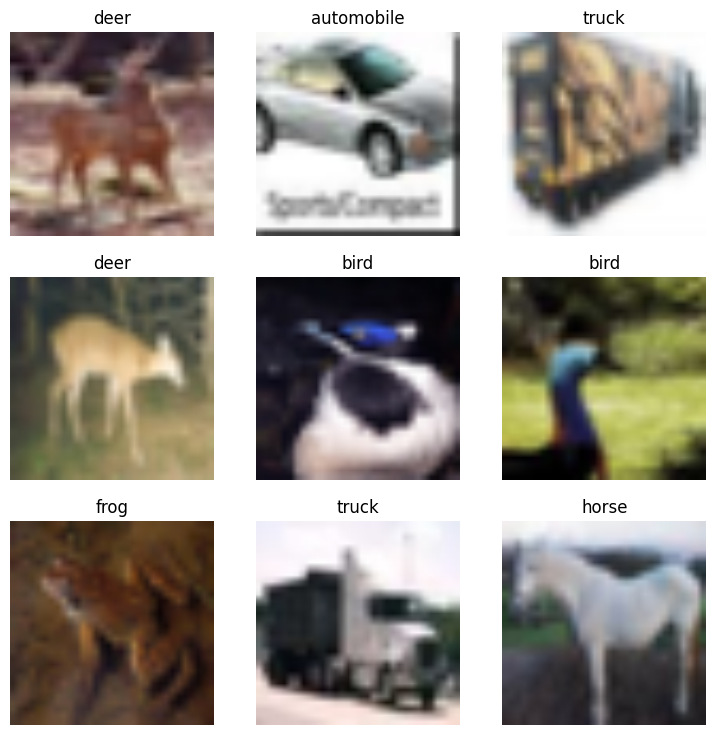

In [11]:
dls.show_batch()

In [12]:
learn = vision_learner(dls, resnet50, metrics=accuracy)

/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to /root/.cache/torch/hub/checkpoints/resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 229MB/s]


SuggestedLRs(valley=0.0004786300996784121)

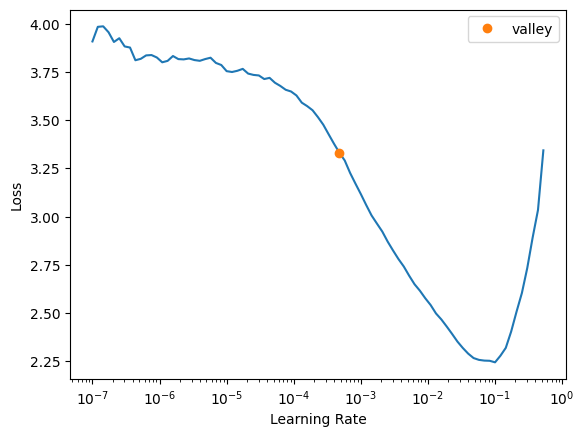

In [13]:
learn.lr_find()

In [14]:
learn.fit_one_cycle(3, 3e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.334813,0.306918,0.901133,02:58
1,0.222446,0.168954,0.944444,02:58
2,0.104588,0.135204,0.955070,02:57


In [15]:
learn.unfreeze()

In [16]:
learn.fit_one_cycle(5, lr_max=slice(1e-6,3e-5))

epoch,train_loss,valid_loss,accuracy,time
0,0.092807,0.132775,0.956082,03:45
1,0.066315,0.131043,0.956082,03:45
2,0.040862,0.129584,0.957498,03:46
3,0.027816,0.130827,0.958207,03:44
4,0.023624,0.126501,0.959320,03:44


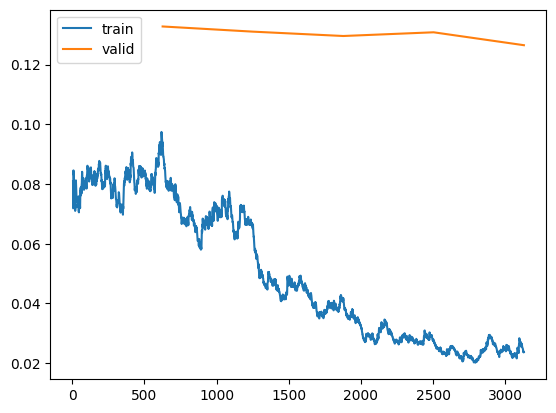

In [17]:
learn.recorder.plot_loss()

In [18]:
import py7zr

archive_path = '/kaggle/input/cifar-10/test.7z'
extract_folder = '/kaggle/temp/test/'

with py7zr.SevenZipFile(archive_path, mode='r') as archive:
    archive.extractall(path=extract_folder)


In [19]:
learn.save('/kaggle/working/vision')

Path('/kaggle/working/vision.pth')

In [20]:
# os.listdir('/kaggle/temp/test/test')
len(os.listdir('/kaggle/temp/test/test'))

300000

In [21]:
path='/kaggle/temp/test/test'
f=os.listdir(path)
new=[str(path)+'/'+s for s in f]

In [22]:
test_dl=learn.dls.test_dl(new)

In [23]:
class_score,y=learn.get_preds(dl=test_dl)

In [24]:
class_score

tensor([[1.0217e-06, 9.9999e-01, 2.8854e-09,  ..., 1.3710e-09, 6.8416e-07,
         1.1971e-05],
        [1.2137e-04, 5.1528e-05, 1.8797e-02,  ..., 2.6981e-04, 9.5585e-05,
         7.2290e-04],
        [3.2103e-07, 7.0924e-08, 2.2855e-04,  ..., 4.3333e-07, 1.6336e-06,
         1.0521e-07],
        ...,
        [1.6945e-03, 7.2127e-05, 2.4898e-03,  ..., 6.8234e-02, 1.0503e-03,
         2.0470e-02],
        [1.9537e-12, 1.2536e-10, 3.2032e-11,  ..., 3.3674e-10, 1.3660e-11,
         6.9844e-12],
        [5.7887e-08, 1.6074e-07, 2.9092e-06,  ..., 1.1865e-05, 6.9443e-09,
         1.4768e-07]])

In [25]:
class_score = np.argmax(class_score, axis=1)

In [26]:
class_score[1].item()

3

In [27]:
class_score

tensor([1, 3, 4,  ..., 4, 5, 4])

In [28]:
classScore=class_score.tolist()

In [29]:
len(classScore)

300000

In [30]:
learn.dls.vocab

['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [31]:
classes={0:'airplane',1:'automobile',2:'bird',3:'cat',4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}

In [32]:
predicted_classes=np.empty(shape=300000,dtype=np.dtype('U20'))

In [33]:
ind=0
for i in (classScore):
    predicted_classes[ind]=classes[i]
    ind=ind+1

In [34]:
predicted_classes

array(['automobile', 'cat', 'deer', ..., 'deer', 'dog', 'deer'],
      dtype='<U20')

In [35]:
directory = '/kaggle/temp/test/test'
ImageId = [ (''.join(filter(str.isdigit, name ))) for name in os.listdir(directory)]

In [36]:
submission  = pd.DataFrame({
    "id": ImageId,
    "label": predicted_classes
})
# submission.sort_values(by=["ImageId"], inplace = True)
submission.to_csv("submission.csv", index=False)
display(submission.head(3))
display(submission.tail(3))

,id,label
0,287200,automobile
1,33557,cat
2,281872,deer


,id,label
299997,253814,deer
299998,17297,dog
299999,259315,deer


In [37]:
submission['id']=submission['id'].astype(int)

In [38]:
submission.to_csv('submission.csv', index=False)

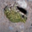

In [39]:
im = Image.open('/kaggle/temp/test/test/134190.png')
im.to_thumb(254,254)